In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# Fungi Growth Model - Evan Coons, Ben Stewart, Jessie Baker, Ronan Nayak {-}

## Intro - Questions, Background, etc. {-}

### Background {-}

The carbon cycle is the continuous process in which carbon is exchanged between organisms and the environment, and is reused throughout the planet. This process is very important for sustaining life on Earth. Fungi are the primary decomposers of organic material in the terrestrial ecosystem, and therefore are critical components in the carbon cycle. The main contribution of fungus in the carbon cycle is decomposing wood. Current climate models don’t accurately reflect how diversity in fungal traits affect their ability to decompose wood. It would greatly help the level of detail of these models to account for differing fungal traits in their assumptions. With this higher resolution climate model, we can more accurately predict future wood decomposition.

In general, fungi have many traits that can differ between species, each of which affects their ability to decompose in a different magnitude. Two traits of fungi we will focus on are moisture tolerance niche and hyphal extension rate. Moisture tolerance niche is essentially the range of the moisture level at which half of a fungal community can maintain its fastest growth rate. Hyphal extension rate is the growth rate of the cells that form the filaments of the fungi. Larger hyphal extension rates indicate a faster decomposition rate and larger moisture tolerance niches indicate a slower decomposition rate. The perk of a higher moisture tolerance nuche, though, is that these fungi can survive better in a variety of climates. This suggests that they may not decompose wood as fast as those with higher hyphal extension rates, however they can decompose in a more diverse setting. We will analyze the effect of these traits on the decomposition rate of differing fungal communities.


  

### Requirement {-}

In this problem we are tasked with investigating how the growth rates and moisture tolerance niches of different species of fungi affect their ability to decompose wood and ground litter. Additionally, we are asked analyze the species’ competition with each other and the effect of environmental moisture level on the two species’ abilities to decompose wood and compete with each other.  We are also asked to examine the long term behavior in each of the varying situations. All of this is meant to assist in gaining a better understanding of how the diversity of fungal communities affects the efficiency of that community’s ability to decompose wood and  participate meaningfully in the carbon cycle.

## Spatial Linear Stochastic Model (Discrete Time) {-} 

In this spatial model, c1 and c2 are the constants that determine the growth rates for the blue fungi and the red fungi, respectively. They are also known as the constants of proportionality. They determine the amount that the fungi expand at each time step. 

In [2]:
def run_simulation(start_coords, c1, c2, t):
    global grid 
    grid = np.zeros([100,100])
    global a_x_coords
    global a_y_coords
    global b_x_coords
    global b_y_coords
    a_x_coords = []
    a_y_coords = []
    b_x_coords = []
    b_y_coords = []
    
    grid[start_coords[0]] = 2
    grid[start_coords[1]] = 1
    a_x_coords.append(start_coords[0][0])
    a_y_coords.append(start_coords[0][1])
    b_x_coords.append(start_coords[1][0])
    b_y_coords.append(start_coords[1][1])
    for i in range(t):
        expansion_a = expansion_size(c1)
        expansion_b = expansion_size(c2)
        count = 0
        while count < expansion_a: 
            rand_coord_x = np.random.randint(max(min(a_x_coords) - 1, 0), min(max(a_x_coords) + 2, grid.shape[1] - 1))
            rand_coord_y = np.random.randint(max(min(a_y_coords) - 1, 0), min(max(a_y_coords) + 2, grid.shape[0] - 1))
            if((grid[rand_coord_x, rand_coord_y] == 0) & ((grid[rand_coord_x + 1, rand_coord_y] == 2) | (grid[rand_coord_x, rand_coord_y + 1] == 2) | (grid[rand_coord_x - 1, rand_coord_y] == 2) | (grid[rand_coord_x, rand_coord_y - 1] == 2))):
                grid[rand_coord_x, rand_coord_y] = 2
                count += 1
                a_x_coords.append(rand_coord_x)
                a_y_coords.append(rand_coord_y)
            
        count = 0
        while count < expansion_b:
            rand_coord_x = np.random.randint(max(min(b_x_coords) - 1, 0), min(max(b_x_coords) + 2, grid.shape[1] - 1))
            rand_coord_y = np.random.randint(max(min(b_y_coords) - 1, 0), min(max(b_y_coords) + 2, grid.shape[1] - 1))
            if((grid[rand_coord_x, rand_coord_y] == 0) & ((grid[rand_coord_x + 1, rand_coord_y] == 1) | (grid[rand_coord_x, rand_coord_y + 1] == 1) | (grid[rand_coord_x - 1, rand_coord_y] == 1) | (grid[rand_coord_x, rand_coord_y - 1] == 1))):
                grid[rand_coord_x, rand_coord_y] = 1
                count += 1
                b_x_coords.append(rand_coord_x)
                b_y_coords.append(rand_coord_y)

            


In [3]:
def expansion_size(c): 
    return int(c * np.random.randint(10))

In this model, the fungi have the same growth rates. The last time step is plotted. 

(0.0, 100.0)

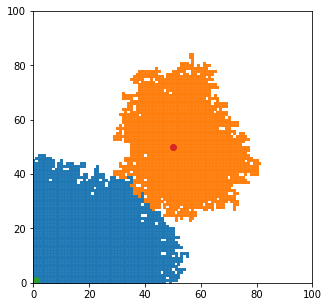

In [4]:
start_coords = [(1,1), (50, 50)]
run_simulation(start_coords, 0.5, 0.5, 1000)

plt.figure(figsize=(5,5))
plt.scatter(a_x_coords, a_y_coords, s = 3, marker = "s")
plt.scatter(b_x_coords, b_y_coords, s = 3, marker = "s")
plt.scatter(x = a_x_coords[0], y = a_y_coords[0])
plt.scatter(x = b_x_coords[0], y = b_y_coords[0])
plt.xlim(0,100)
plt.ylim(0,100)

Here, the fungi also have the same growth rates, but they are in different starting positions and there are more time steps. 

(0.0, 100.0)

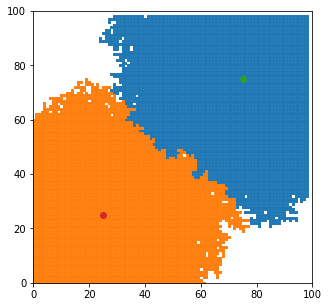

In [5]:
start_coords = [(75,75), (25, 25)]
run_simulation(start_coords, 0.5, 0.5, 2000)
plt.figure(figsize=(5,5))
plt.scatter(a_x_coords, a_y_coords, s = 5, marker = "s")
plt.scatter(b_x_coords, b_y_coords, s = 5, marker = "s")
plt.scatter(x = a_x_coords[0], y = a_y_coords[0])
plt.scatter(x = b_x_coords[0], y = b_y_coords[0])
plt.xlim(0,100)
plt.ylim(0,100)

Model with the orange fungi having a growth rate that is much bigger than the blue fungi. It takes over the area. (This takes a while to run)

(0.0, 100.0)

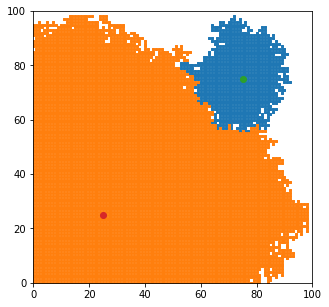

In [6]:
start_coords = [(75,75), (25, 25)]
run_simulation(start_coords, 0.2, 0.9, 2000)
plt.figure(figsize=(5,5))
plt.scatter(a_x_coords, a_y_coords, s = 5, marker = "s")
plt.scatter(b_x_coords, b_y_coords, s = 5, marker = "s")
plt.scatter(x = a_x_coords[0], y = a_y_coords[0])
plt.scatter(x = b_x_coords[0], y = b_y_coords[0])
plt.xlim(0,100)
plt.ylim(0,100)

## Spatial Logistic Stochastic Model (Discrete Time) {-}

For this model, more complexity is introduced. The growth is logistic and there are more parameters, like direct competition between fungi touching eachother. In the jupyter notebook, these models are interactive -- there is a slider for `t`

In [15]:
from itertools import cycle
import numpy as np
import plotlymath as plt

from ipywidgets import FloatSlider, IntSlider, Button, VBox
from myutils import interact
colors = plt.plotly.colors.DEFAULT_PLOTLY_COLORS

In [9]:
def expansion_size_2(r, size, trapped, overtake = False): 
    if trapped & ~overtake:  
        return int(20 * r * (np.random.randn() + 1.5) * (1 - size / (100 * 100)) + r * 10)
    else: 
        return int(20 * r * (np.random.randn() + 1.5) * (1 - size / (100 * 100)) + 1)

In [31]:
def run_simulation_2(start_coords, c1, c2, t, overtake, trapped):
    global grid 
    grid = np.zeros([100,100])
    global a_x_coords
    global a_y_coords
    global b_x_coords
    global b_y_coords
    global time_a
    global time_b
    global a_coords
    global b_coords
    a_x_coords = []
    a_y_coords = []
    b_x_coords = []
    b_y_coords = []
    time_a = [0]
    time_b = [0]
    a_coords = []
    b_coords = []
    
    grid[start_coords[0]] = 2
    grid[start_coords[1]] = 1
    a_x_coords.append(start_coords[0][0])
    a_y_coords.append(start_coords[0][1])
    b_x_coords.append(start_coords[1][0])
    b_y_coords.append(start_coords[1][1])
    a_coords.append((start_coords[0][0], start_coords[0][1]))
    b_coords.append((start_coords[1][0], start_coords[1][1]))
    
    interactive = True   
    
    for i in range(t):
        expansion_a = expansion_size_2(c1, len(a_x_coords), trapped, overtake)
        expansion_b = expansion_size_2(c2, len(a_y_coords), trapped)
        count = 0
        for j in range(expansion_a): time_a.append(i)
        while count < expansion_a: 
                
            rand_coord_x = np.random.randint(max(min(a_x_coords) - 1, 0), min(max(a_x_coords) + 2, grid.shape[1] - 1))
            rand_coord_y = np.random.randint(max(min(a_y_coords) - 1, 0), min(max(a_y_coords) + 2, grid.shape[0] - 1))
            
            if((grid[rand_coord_x, rand_coord_y] == 0) & ((grid[rand_coord_x + 1, rand_coord_y] == 2) | (grid[rand_coord_x, rand_coord_y + 1] == 2) | (grid[rand_coord_x - 1, rand_coord_y] == 2) | (grid[rand_coord_x, rand_coord_y - 1] == 2))):
                grid[rand_coord_x, rand_coord_y] = 2
                count += 1
                a_x_coords.append(rand_coord_x)
                a_y_coords.append(rand_coord_y)
                a_coords.append((rand_coord_x, rand_coord_y))
            elif(overtake & interactive & (grid[rand_coord_x, rand_coord_y] == 1) & ((grid[rand_coord_x + 1, rand_coord_y] == 2) | (grid[rand_coord_x, rand_coord_y + 1] == 2) | (grid[rand_coord_x - 1, rand_coord_y] == 2) | (grid[rand_coord_x, rand_coord_y - 1] == 2))):
                grid[rand_coord_x, rand_coord_y] = 2
                count += 1
                a_x_coords.append(rand_coord_x)
                a_y_coords.append(rand_coord_y)
                a_coords.append((rand_coord_x, rand_coord_y)) 
            if trapped & ~overtake:
                interactive = False
                c1 = 0

                
        count = 0
        for j in range(expansion_b): time_b.append(i)
        while count < expansion_b:
            rand_coord_x = np.random.randint(max(min(b_x_coords) - 1, 0), min(max(b_x_coords) + 2, grid.shape[1] - 1))
            rand_coord_y = np.random.randint(max(min(b_y_coords) - 1, 0), min(max(b_y_coords) + 2, grid.shape[1] - 1))
            if((grid[rand_coord_x, rand_coord_y] == 0) & ((grid[rand_coord_x + 1, rand_coord_y] == 1) | (grid[rand_coord_x, rand_coord_y + 1] == 1) | (grid[rand_coord_x - 1, rand_coord_y] == 1) | (grid[rand_coord_x, rand_coord_y - 1] == 1))):
                grid[rand_coord_x, rand_coord_y] = 1
                count += 1
                b_x_coords.append(rand_coord_x)
                b_y_coords.append(rand_coord_y)
                b_coords.append((rand_coord_x, rand_coord_y))
            


    

In [29]:
def discrete_logistic_interactive(time_a, time_b, a_coords, b_coords):
    figure, plot = plt.make_figure(widget=True)
    plot.axes_ranges((0, 100), (0, 100))
    plot.axes_labels(r"X dimension", r"Y dimension")
    total_time = max(max(time_a), max(time_b))
    time_a = np.array(time_a)
    time_b = np.array(time_b)
    a_coords = np.array(a_coords)
    b_coords = np.array(b_coords)
    time = 1
    
    if len(a_coords) < len(time_a): 
        time_a = np.array([0])
    
    @interact(time=IntSlider(min = 1, max= total_time, value= 1))
    def update(time):
        with figure.batch_update():
            plot.points_b = plt.points(b_coords[time_b <= time], color = "red", showlegend=False, marker_size = 4)
            plot.points = plt.points(a_coords[time_a <= time], color = colors[0], showlegend=False, marker_size = 4)
    update(time)
    figure.data[0].update()
    figure.update_layout(autosize=False, width=500, height=500)
   
    return figure

## Competition - same growth rate

In this first interactive model, these two fungi have the same characteristics. Their starting spots are symmetrical and they have the same growth rates. 

In [37]:
start_coords = [(40,50), (60, 50)]
run_simulation_2(start_coords, 0.06, 0.06, 1000, overtake = False, trapped = False)
discrete_logistic_interactive(time_a, time_b, a_coords, b_coords)

interactive(children=(IntSlider(value=1, description='time', max=999, min=1), Output()), _dom_classes=('widget…

FigureWidget({
    'data': [{'marker': {'color': 'red', 'size': 4},
              'mode': 'markers',
         …

## Different Growth rates

In this model, the red fungi has a larger growth rate - twice as large. Over time, it begins to grow much faster. With more time steps, it would grow faster, but it has the same carrying capacity as the blue fungi. 

In [33]:
start_coords = [(40,50), (60, 50)]
run_simulation_2(start_coords, 0.06, 0.12, 1000, overtake = False, trapped = False)
discrete_logistic_interactive(time_a, time_b, a_coords, b_coords)

interactive(children=(IntSlider(value=1, description='time', max=999, min=1), Output()), _dom_classes=('widget…

FigureWidget({
    'data': [{'marker': {'color': 'red', 'size': 4},
              'mode': 'markers',
         …

## Competition - blue can push the red out of the way

In this model, the red fungi's growth rate is still twice as larage, but the blue fungi has a distinct competitive advantage -- it can push the red fungi out. This model represents what might happen in the wild when one fungi is distinctly stronger than other and push it out. In the long term, although the red grows faster, the blue will overtake the area due to this advantage. 

In [34]:
start_coords = [(40,50), (60, 50)]
run_simulation_2(start_coords, 0.06, 0.12, 1000, overtake = True, trapped = False)
discrete_logistic_interactive(time_a, time_b, a_coords, b_coords)

interactive(children=(IntSlider(value=1, description='time', max=999, min=1), Output()), _dom_classes=('widget…

FigureWidget({
    'data': [{'marker': {'color': 'red', 'size': 4},
              'mode': 'markers',
         …

## Fungi gets trapped

The starting position of the fungi on the wood is also important. Modeled here, the blue fungi first attaches to the wood in the bottom left corner. The red fungi happens to attach in a spot very close, and it has a faster growth rate. The red fungi then extends to the edge of the wood, and the blue fungi does not have room to expand. 

In [35]:
start_coords = [(1,1), (5, 5)]
run_simulation_2(start_coords, 0.02, 0.14, 1000, overtake = False, trapped = True)
discrete_logistic_interactive(time_a, time_b, a_coords, b_coords)

interactive(children=(IntSlider(value=1, description='time', max=999, min=1), Output()), _dom_classes=('widget…

FigureWidget({
    'data': [{'marker': {'color': 'red', 'size': 4},
              'mode': 'markers',
         …

## Fungi gets trapped and but can push out red Fungi

In this fifth and final simulation, the blue fungi is trapped in the bottem left as above, but it is given the characteristic of being able to overtake the red fungi, similar to the third model. Although the red grows quickly to begin, the blue overtakes over time due to this competitive advantage. 

In [36]:
start_coords = [(1,1), (5, 5)]
run_simulation_2(start_coords, 0.02, 0.12, 1000, overtake = True, trapped = True)
discrete_logistic_interactive(time_a, time_b, a_coords, b_coords)

interactive(children=(IntSlider(value=1, description='time', max=999, min=1), Output()), _dom_classes=('widget…

FigureWidget({
    'data': [{'marker': {'color': 'red', 'size': 4},
              'mode': 'markers',
         …

#### Conclusion {-}

In the short term, the growth rate is the most important factor in determining the dominance of fungi. In the long term, though, the competitive advantage of being able to overtake determine the dominance of fungi. 

## Deterministic Logistic Model - Lotka Volterra {-}

$\frac{dx}{dt}=r_xx(1-\frac{x-\alpha_{xy} y}{K_x})$

$\frac{dy}{dt}=r_yy(1-\frac{y-\alpha_{yx} y}{K_y})$

$\frac{dw}{dt}=aX+bY$

$r_x=$ Growth rate of species X

$r_y=$ Growth rate of species Y

$\alpha_{xy} =$ Competition coefficient of Y on X

$\alpha_{yx} =$ Competition coefficient of X on Y

$K_x=$ Carrying capacity of species X

$K_y=$ Carring capacity of species Y

$a=$ Decomposition coefficient of species X

$b=$ Decomposition coefficient of species Y

### Competition Model 1 {-}
Two species, X and Y, are competing for survival on a wooden log. Species X has a higher growth rate than species Y and Species Y has a higher moisture tolerance range than Species X. In this model, the moisture level is at a point that gives Species Y a competitive advantage over Species X.

$\frac{dx}{dt}=1.05x(1-\frac{x+0.5y}{100})$

$\frac{dy}{dt}=1.03y(1-\frac{y+0.2x}{100})$


$r_x=1.05$, $r_y=1.03$, $\alpha_{xy} = 0.5$, $\alpha_{yx} = 0.2$, $K_x=$100, $K_Y=100$


We know three of the fixed points: (0, 0), (100, 0), (0, 100) given the carrying capacities. To find the fourth:

$0=1-\frac{x+0.5y}{100}$

$100=x+0.5y$

$x=100-0.5y$


$0=1-\frac{y+0.2x}{100}$

$100=y+0.2x$

$y=100-0.2x$



$x=100-0.5(100-0.2x)$

$x=150-50+0.1x$

$0.9x=50$

$x=55.56$

$y=77.78$

The fixed points are: $\textbf{(0,0), (100, 0), (0, 100), (55.56, 88.89)}$

$J=
\begin{bmatrix}
1.05(1+\frac{-2x-0.5y}{100}) & -0.0035x\\
-0.00206x & 1.03(1+\frac{-2y-0.2x}{100})
\end{bmatrix}$

In [ ]:
def find_eig1(x, y):
  j = np.array([[1.05 * (1 + (-2 * x - 0.5 * y) / 100), -0.00525 * x], [-0.0103 * x, 1.03 * (1 + (-2 * y - 0.2 * x) / 100)]])
  return np.linalg.eig(j)

Two positive real eigenvalues, unstable source at (0,0)

In [ ]:
find_eig1(0,0)[0]

array([1.05, 1.03])

One negative and one positive eigenvalue, saddle at (100, 0)

In [ ]:
find_eig1(100, 0)[0]

array([-1.30409991,  1.07809991])

One negative one positive eigenvalue, saddle at (0, 100)

In [ ]:
find_eig1(0, 100)[0]

array([ 0.525, -1.03 ])

Two negative real eigenvalues, stable sink at (55.56, 88.89)

In [ ]:
find_eig1(55.56, 88.89)[0]

array([-0.30848102, -1.19053908])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


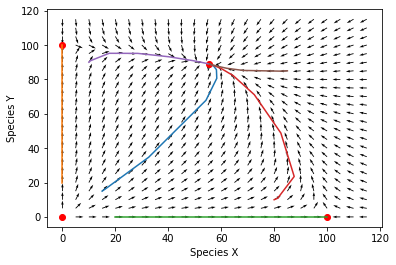

In [ ]:
def f1(t, state):
   X, Y = state
   X_prime = (X * 1.05) * (1 - ((X + 0.5 * Y) / 100))
   Y_prime = (Y * 1.03) * (1 - ((Y + 0.2 * X) / 100))
   return (X_prime, Y_prime)

x = np.arange(0, 120, 5)
y = np.arange(0, 120, 5)
X, Y = np.meshgrid(x, y)

dx = (X * 1.05) * (1 - ((X + 0.5 * Y) / 100))
dy = (Y * 1.03) * (1 - ((Y + 0.2 * X) / 100))

dxu = dx/(np.sqrt(dx * dx + dy * dy))
dyu = dy/(np.sqrt(dx * dx + dy * dy))

t_interval = (0, 100)
initial_state = (15, 15)
solution = solve_ivp(f1, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (0, 20)
solution = solve_ivp(f1, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (20, 0)
solution = solve_ivp(f1, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (80, 10)
solution = solve_ivp(f1, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (10, 90)
solution = solve_ivp(f1, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (85, 85)
solution = solve_ivp(f1, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

x_fixed3 = [0, 100, 0, 55.56]
y_fixed3 = [0, 0, 100, 88.89]

plt.quiver(X, Y, dxu, dyu, color = "k")
plt.scatter(x_fixed3, y_fixed3, color = "r")
plt.xlabel("Species X")
plt.ylabel("Species Y")
plt.show()

Species X decomposes wood at 1 unit of wood per 10 fungi per day. Species Y decomposes wood at 1 unit of wood per 20 fungi per day. Species X decomposes wood at a faster rate because it has a higher growth rate than species Y.

$\frac{dw}{dt}=-0.1X-0.05Y$

The wood will be completely decomposed in  101 days if the initial population is (1, 1)


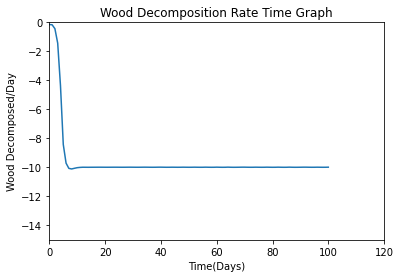

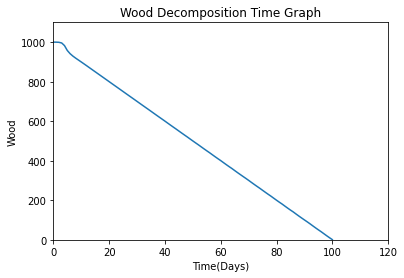

In [ ]:
t_interval = (0, 500)
initial_state = (1, 1)
solution = solve_ivp(f1, t_interval, initial_state)
dw = -0.1 * solution.y[0] + -0.05 * solution.y[1]

a = []
for i in range(len(dw)):
  if (1000 + dw[i] * i) >= 0:
    a.append(1000 + dw[i] * i)

print("The wood will be completely decomposed in ", len(a), "days if the initial population is (1, 1)")
plt.plot(dw[0:len(a)])
plt.xlim([0, 120])
plt.ylim([-15, 0])
plt.xlabel("Time(Days)")
plt.ylabel("Wood Decomposed/Day")
plt.title("Wood Decomposition Rate Time Graph")
plt.show()
plt.plot(a)
plt.xlim([0, 120])
plt.ylim([0, 1100])
plt.xlabel("Time(Days)")
plt.ylabel("Wood")
plt.title("Wood Decomposition Time Graph")
plt.show()

### Competition Model 2 {-}
Two species, X and Y, are competing for survival on a wooden log. Species X has a higher growth rate than species Y and Species Y has a higher moisture tolerance range than Species X. In this model, the moisture level is NOT at a point that gives Species Y a competitive advantage over Species X, and this Species X has a competitive advantage due to higher growth rate.

$\frac{dx}{dt}=1.05x(1-\frac{x+0.2y}{100})$

$\frac{dy}{dt}=1.03y(1-\frac{y+0.5x}{100})$

$r_x=1.05$, $r_y=1.03$, $\alpha_{xy} = 0.2$, $\alpha_{yx} = 0.5$, $K_x=$100, $K_Y=100$

We know three of the fixed points: (0, 0), (100, 0), (0, 100) given the carrying capacities. To find the fourth:

$0=1-\frac{x+0.2y}{100}$

$100=x+0.2y$

$x=100-0.2y$

$0=1-\frac{y+0.5x}{100}$

$100=y+0.5x$

$y=100-0.5x$

$x=100-0.2(100-0.5x)$

$x=100-20+0.1x$

$0.9x=80$

$x=88.89$

$y=55.56$

The fixed points are: $\textbf{(0,0), (100, 0), (0, 100), (88.89, 55.56)}$

$J = \begin{bmatrix}
1.05(1+\frac{-2x-0.2y}{100}) & -0.0021x\\
-0.00515y & 1.03(1+\frac{-2y-0.5x}{100})
\end{bmatrix}$

In [ ]:
def find_eig2(x, y):
  j = np.array([[1.05 * (1 + (-2 * x - 0.2 * y) / 100), -0.0021 * x], [-0.00515 * y, 1.03 * (1 + (-2 * y - 0.5 * x) / 100)]])
  return np.linalg.eig(j)

Two positive eigenvalues, unstable source at (0,0)

In [ ]:
find_eig2(0,0)[0]

array([1.05, 1.03])

One negative and one positive eigenvalue, saddle at (100, 0)

In [ ]:
find_eig2(100,0)[0]

array([-1.05 ,  0.515])

One negative and one positive eigenvalue, saddle at (0, 100)

In [ ]:
find_eig2(0, 100)[0]

array([-1.03,  0.84])

Two positive real eigenvalues, stable sink at (88.89, 55.56)

In [ ]:
find_eig2(88.89, 55.56)

(array([-1.04610201, -0.45958349]), array([[-0.85600317,  0.36657111],
        [-0.51697057, -0.93039004]]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


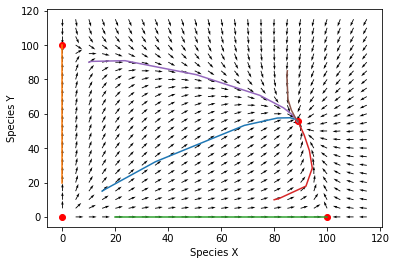

In [ ]:
def f2(t, state):
   X, Y = state
   X_prime = (X * 1.05) * (1 - ((X + 0.2 * Y) / 100))
   Y_prime = (Y * 1.03) * (1 - ((Y + 0.5 * X) / 100))
   return (X_prime, Y_prime)

x = np.arange(0, 120, 5)
y = np.arange(0, 120, 5)
X, Y = np.meshgrid(x, y)

dx = (X * 1.05) * (1 - ((X + 0.2 * Y) / 100))
dy = (Y * 1.03) * (1 - ((Y + 0.5 * X) / 100))

dxu = dx/(np.sqrt(dx * dx + dy * dy))
dyu = dy/(np.sqrt(dx * dx + dy * dy))

t_interval = (0, 100)
initial_state = (15, 15)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (0, 20)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (20, 0)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (80, 10)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (10, 90)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (85, 85)
solution = solve_ivp(f2, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

x_fixed4 = [0, 100, 0, 88.89]
y_fixed4 = [0, 0, 100, 55.56]

plt.quiver(X, Y, dxu, dyu, color = "k")
plt.scatter(x_fixed4, y_fixed4, color = "r")
plt.xlabel("Species X")
plt.ylabel("Species Y")
plt.show()

Species X decomposes wood at 1 unit of wood per 10 fungi per day. Species Y decomposes wood at 1 unit of wood per 20 fungi per day. Species X decomposes wood at a faster rate because it has a higher growth rate than species Y.

$\frac{dw}{dt}=-0.1X-0.05Y$

The wood will be completely decomposed in  86 days if the initial population is (1, 1)


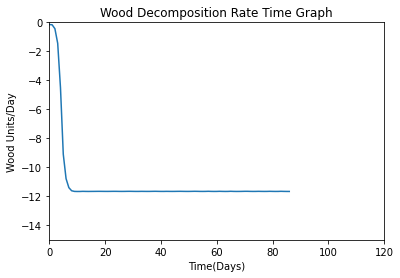

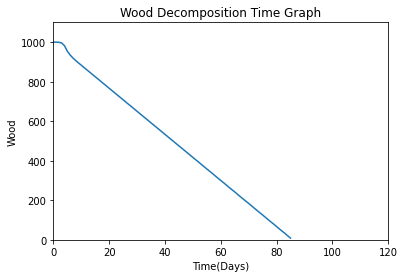

In [ ]:
t_interval = (0, 250)
initial_state = (1, 1)
solution = solve_ivp(f2, t_interval, initial_state)
dw = -0.1 * solution.y[0] + -0.05 * solution.y[1]

a = []
for i in range(len(dw)):
  if (1000 + dw[i] * i) >= 0:
    a.append(1000 + dw[i] * i)

print("The wood will be completely decomposed in ", len(a), "days if the initial population is (1, 1)")
plt.plot(dw)
plt.xlim([0, 120])
plt.ylim([-15, 0])
plt.xlabel("Time(Days)")
plt.ylabel("Wood Units/Day")
plt.title("Wood Decomposition Rate Time Graph")
plt.show()
plt.plot(a)
plt.xlim([0, 120])
plt.ylim([0, 1100])
plt.xlabel("Time(Days)")
plt.ylabel("Wood")
plt.title("Wood Decomposition Time Graph")
plt.show()

### Competition Model 3 {-}

Two species, X and Y, are competing for survival on a wooden log. Species X and Species Y have the same growth rate and Species X has a greater moisture tolerance range than Species Y . In this model, the moisture level is at a point that gives Species X a competitive advantage over Species Y. 

$\frac{dx}{dt}=1.05x(1-\frac{x+0.4y}{100})$

$\frac{dy}{dy}=1.05y(1-\frac{y+0.8x}{100})$

$r_x=1.05$, $r_y=1.05$, $\alpha_{xy} = 0.4$, $\alpha_{yx} = 0.8$, $K_x=$100, $K_Y=100$

We know three of the fixed points: (0, 0), (100, 0), (0, 100) given the carrying capacities. To find the fourth:

$0=1-\frac{x+0.4y}{100}$

$100=x+0.4y$

$x=100-0.4y$

$0=0=1-\frac{y+0.8x}{100}$

$100=y+0.8x$

$y=100-0.8x$

$x=100-0.4(100-0.8x$

$x=100-40+0.32x$

$0.68x=60$

$x=88.24$

$y=29.41$


The fixed points are: $\textbf{(0,0), (100, 0), (0, 100), (88.24, 29.41)}$

$J=
\begin{bmatrix}
1.05(1+\frac{-2x-0.4y}{100}) & -0.0042x\\
-0.0084y & 1.05(1+\frac{-2y-0.8x}{100})
\end{bmatrix}$

In [ ]:
def find_eig3(x, y):
    j = np.array([[1.05 * (1 + (-2 * x - 0.4 * y) / 100), -0.0042 * x],[-0.0084 * y, 1.05 * (1 + (-2 * y - 0.8 * x) / 100)]])
    return np.linalg.eig(j)

Two negative eigenvalues, unstable source at (0, 0)

In [ ]:
find_eig3(0,0)[0]

array([1.05, 1.05])

One negative one positive eigenvalue, saddle at (0, 100)

In [ ]:
find_eig3(100, 0)[0]

array([-1.05,  0.21])

One negative one positive eigenvalue, saddle at (0, 100)

In [ ]:
find_eig3(0, 100)[0]

array([-1.05,  0.63])

Two negative eigenvalues, stable sink at (88.24, 29.41)

In [ ]:
find_eig3(88.24, 29.41)[0]

array([-1.050078, -0.18531 ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


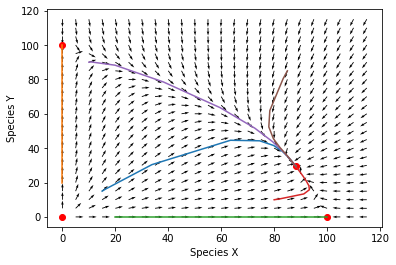

In [ ]:
def f3(t, state):
   X, Y = state
   X_prime = (X * 1.05) * (1 - ((X + 0.4 * Y) / 100))
   Y_prime = (Y * 1.05) * (1 - ((Y + 0.8 * X) / 100))
   return (X_prime, Y_prime)
  
x = np.arange(0, 120, 5)
y = np.arange(0, 120, 5)
X, Y = np.meshgrid(x, y)

dx = (X * 1.05) * (1 - ((X + 0.4 * Y) / 100))
dy = (Y * 1.05) * (1 - ((Y + 0.8 * X) / 100))

dxu = dx/(np.sqrt(dx * dx + dy * dy))
dyu = dy/(np.sqrt(dx * dx + dy * dy))

t_interval = (0, 100)
initial_state = (15, 15)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (0, 20)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (20, 0)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (80, 10)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (10, 90)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

t_interval = (0, 100)
initial_state = (85, 85)
solution = solve_ivp(f3, t_interval, initial_state)
plt.plot(solution.y[0], solution.y[1])

x_fixed5 = [0, 100, 0, 88.24]
y_fixed5 = [0, 0, 100, 29.41]

plt.quiver(X, Y, dxu, dyu, color = "k")
plt.scatter(x_fixed5, y_fixed5, color = "r")
plt.xlabel("Species X")
plt.ylabel("Species Y")
plt.show()

Species X and Species Y have the same growth rate, so they both decompose wood at the same rate of 0.1 units of wood per unit of fungi.

$\frac{dw}{dt}=-0.1X-0.1Y$

The wood will be completely decomposed in  86 days if the initial population is (1, 1)


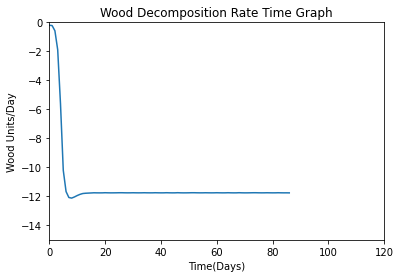

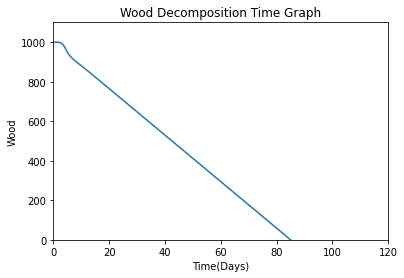

In [ ]:
t_interval = (0, 250)
initial_state = (1, 1)
solution = solve_ivp(f3, t_interval, initial_state)
dw = -0.1 * (solution.y[0] + solution.y[1])

a = []
for i in range(len(dw)):
  if (1000 + dw[i] * i) >= 0:
    a.append(1000 + dw[i] * i)

print("The wood will be completely decomposed in ", len(a), "days if the initial population is (1, 1)")
plt.plot(dw)
plt.xlim([0, 120])
plt.ylim([-15, 0])
plt.xlabel("Time(Days)")
plt.ylabel("Wood Units/Day")
plt.title("Wood Decomposition Rate Time Graph")
plt.show()
plt.plot(a)
plt.xlim([0, 120])
plt.ylim([0, 1100])
plt.xlabel("Time(Days)")
plt.ylabel("Wood")
plt.title("Wood Decomposition Time Graph")
plt.show()

## Conclusions {-}

Many conclusions can be drawn from both our spatial models and Lotka-Volterra competition models. 

First, we will analyze the spatial model to get a sense of how fungi competes on a block of wood, without yet paying attention to wood decomposition. It is evident that the starting position is important in a species' success in direct fungal growth competition. Additonally, direct competition between species directly affects their survival. When two groups of fungi are directly up against one another, the one with the competitive advantage will ultimately take up more space. If one species is able to overtake the other as shows in models 3 and 5, the species that is abke to overtake the other has more succesful growth in the long term. In a concise statement, the spatial model tells us that short term outcomes are determined by growth rate (or constant of proportionality in logistic equation), while long term outcomes is determined by the direct competitive advantage when fungi are in proximity. 

Next, let us analyze our Lotka-Volterra competition models. 

In Competition Model #1, we see that moisture tolerance is a more important competition factor than growth rate in non-optimal moisture conditions. This is represented by the stable sink fixed point at (55.56, 88.89) as species Y had a greater moisture tolerance niche range than species X which had a higher growth rate. Species Y ended with a greater population. In this model, the wood decomposed completely in 101 days which is longer than the other two models because the species with the higher moisture tolerance niche range outcompeted the species with the higher growth rate.

In Competition Model #2, we see that growth rate is a more important competition factor than moisture tolerance in optimal moisture conditions. This is represented by the stable sink at (88.89, 55.56) as species X had a greater growth rate than Species Y which had a higher moisture tolerance niche range. Species X ended with a greater population. In this model, the wood decomposed completely in 86 days which is shorter than the first model because the species with the higher growth rate outcompeted the species with the higher moisture tolerance niche range.

In Competiton Model #3, we see that in the event that both species have the same growth rate, moisture tolerance niche range is a very important competition factor. This is represented by the stable sink fixed pooint at (88.24, 29.41) as Species X and Species Y have the same growth rate but species X has a greater moisture tolerance niche range. In this model, the wood decomposed completely after 86 days, similar to the 2nd model as there were two species with a high growth rate decomposing the wood. 

As a whole, these modeles are a tool which can characaterize fungal growth in the wild. They aid in both the visualization and quantification of competition and wood decomposition

## How can we improve {-}

For the spatial simulation: 


*   We can come up with a better algorithm so that we can simulate more time steps
*   Function can take in more parameters to better model competition
*   Longer simulation to have more detailed models.

For the Lotka-Volterra Logistic Competition:

*   Defined function to set competition coefficient
*   Specific carrying capactities for certain types of species
*   Better representation of how carrying capacities are effected by wood degredation
